In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  False
OS:  linux


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [11]:
model=model_actions.load("checkpoints/bs_128_sch_plateau/bs_128_sch_plateau_epoch_160")

In [12]:
conv_w=[]
for name, param in model.named_parameters():
    if "conv" in name and param.size()[2] == 3: # kernels 3x3
        for i in param.tolist():
            for j in i:
                conv_w.append(j)

In [13]:
conv_w_flat = np.array(conv_w).flatten()

In [14]:
print(min(conv_w_flat))
print(max(conv_w_flat))
print(conv_w_flat.mean())
print(conv_w_flat.std())

-0.5033373236656189
0.4561920464038849
-0.00017370819079944112
0.00780817245143656


In [18]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

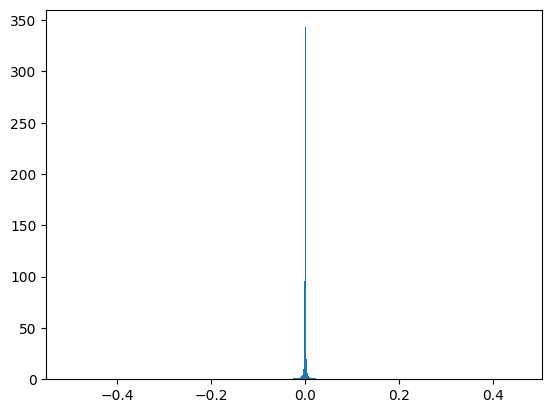

In [19]:
_=plt.hist(conv_w_flat, bins=500, density=True)

# reviewing weights as the train progresses

In [3]:

w_dict={}
w_dict["min"]=[]
w_dict["max"]=[]
w_dict["mean"]=[]
w_dict["std"]=[]
for i in range(1,161):
    if i%20==0:
        model=model_actions.load("checkpoints/bs_128_sch_plateau/bs_128_sch_plateau_epoch_"+str(i))
        model.eval()
        conv_w=[]
        for name, param in model.named_parameters():
            if "conv" in name and param.size()[2] == 3: # kernels 3x3
                for i in param.tolist():
                    for j in i:
                        conv_w.append(j)

        conv_w_flat = np.array(conv_w).flatten()

        w_dict["min"].append(min(conv_w_flat))
        w_dict["max"].append(max(conv_w_flat))
        w_dict["mean"].append(conv_w_flat.mean())
        w_dict["std"].append(conv_w_flat.std())


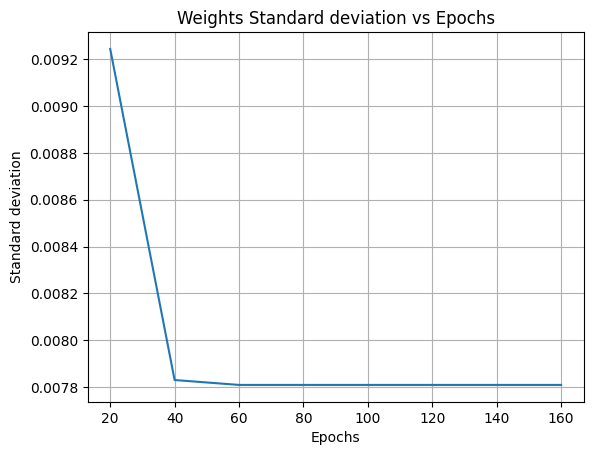

In [4]:
x=np.array(range(1,9))*20
plt.plot(x,w_dict["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Weights Standard deviation vs Epochs")
plt.show()

In [11]:

my_dict={}
my_dict["my"]="test"

# Weight stats for progressive training

In [11]:
#training progressive weight stats (ws)
def prog_ws():
    total_epochs=100
    step=101

    sch="plateau"
    bs=128
    wd=5e-5
    m=0.9

    name="bs_"+str(bs) + "_progressive_weight_stats"

    save_folder=name+"/"+name
    net=models.resnet18(num_classes=10)
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=m, weight_decay=wd)

    if sch=="cosine":
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
    elif sch=="plateau":
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
    elif sch=="exp":
        # Decay LR by a factor of 0.1 every 7 epochs
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [ ]:
az_manage_proc.run_and_delete(log.log_time,prog_ws)

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
Found existing instance, use it.
Logging time
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10

Epoch: 11

Epoch: 12

Epoch: 13

Epoch: 14

Epoch: 15

Epoch: 16

Epoch: 17

Epoch: 18

Epoch: 19

Epoch: 20

Epoch: 21

Epoch: 22

Epoch: 23

Epoch: 24

Epoch: 25

Epoch: 26

Epoch: 27

Epoch: 28

Epoch: 29

Epoch: 30

Epoch: 31

Epoch: 32

Epoch: 33

Epoch: 34

Epoch: 35

Epoch: 36

Epoch: 37

Epoch: 38

Epoch: 39

Epoch: 40

Epoch: 41

Epoch: 42

Epoch: 43

Epoch: 44

Epoch: 45

Epoch: 46

Epoch: 47

Epoch: 48

Epoch: 49

Epoch: 50

Epoch: 51

Epoch: 52

Epoch: 53

Epoch: 54

Epoch: 55

Epoch: 56

Epoch: 57

Epoch: 58

Epoch: 59

Epoch: 60

Epoch: 61

Epoch: 62

Epoch: 63

Epoch: 64

Epoch: 65

Epoch: 66

Epoch: 67

Epoch: 68

Epoch: 69

Epoch: 70

Epoch: 71

Epoch: 72

Epoch: 73

Epoch: 74

Epoch: 75

Epoch: 76

Epoch: 77

Epoch: 78

E

In [3]:
loaded=utils.load("bs_128_progressive_weight_stats.json")

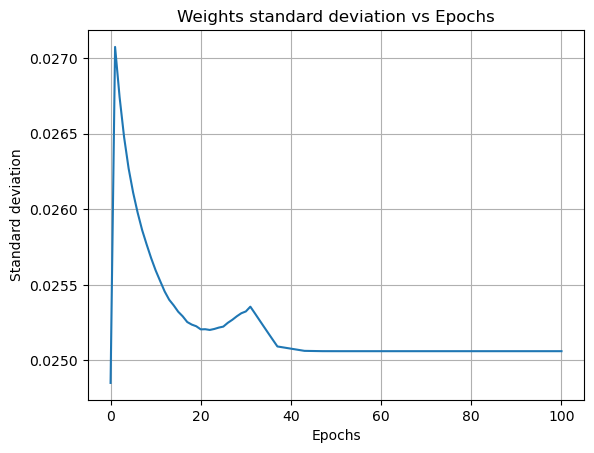

In [7]:
plt.plot(loaded["weight_stats"]["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Weights standard deviation vs Epochs")
plt.show()

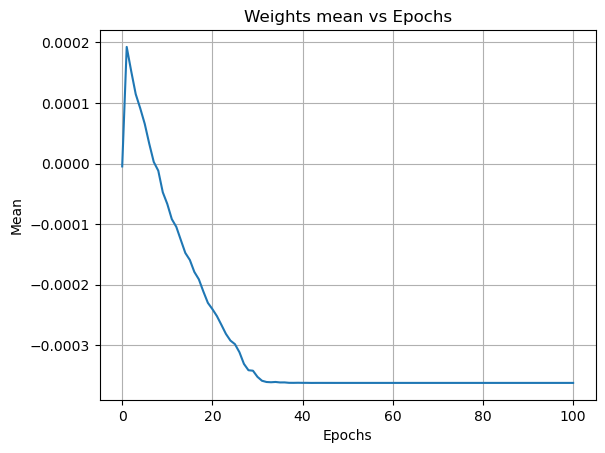

In [11]:
plt.plot(loaded["weight_stats"]["mean"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Mean")
plt.title("Weights mean vs Epochs")
plt.show()

In [8]:
loaded

{'train_acc_v': [28.172,
  42.472,
  50.088,
  56.304,
  60.852,
  63.894,
  66.634,
  68.992,
  70.28,
  72.274,
  73.354,
  74.698,
  75.682,
  76.13,
  77.178,
  77.82,
  78.456,
  79.298,
  79.792,
  80.172,
  80.406,
  81.14,
  81.358,
  81.926,
  82.368,
  82.6,
  82.83,
  83.416,
  83.482,
  83.654,
  84.222,
  87.86,
  88.906,
  89.272,
  89.586,
  89.954,
  90.052,
  90.696,
  90.504,
  90.768,
  90.804,
  90.848,
  91.01,
  90.768,
  90.99,
  90.902,
  90.986,
  90.916,
  91.006,
  90.938,
  90.85,
  90.836,
  90.914,
  90.77,
  91.086,
  91.022,
  90.84,
  91.046,
  90.954,
  90.996,
  91.112,
  91.054,
  90.896,
  91.0,
  90.896,
  90.918,
  90.98,
  90.884,
  90.908,
  91.156,
  91.018,
  90.94,
  91.002,
  91.03,
  91.024,
  90.934,
  90.858,
  90.926,
  91.018,
  90.842,
  90.98,
  90.9,
  90.9,
  91.062,
  90.888,
  90.79,
  90.956,
  91.046,
  90.898,
  90.794,
  90.872,
  90.778,
  90.754,
  90.936,
  90.898,
  90.986,
  90.776,
  90.856,
  90.808,
  90.862],
 'train_

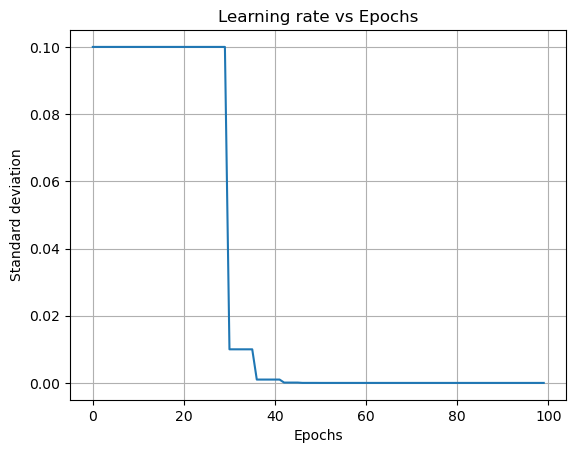

In [10]:
plt.plot(loaded["current_lr_v"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Learning rate vs Epochs")
plt.show()